In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset ML/Copy of data_cardiovascular_risk.csv')

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.shape

(3390, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [9]:
# dropped ther rows which includes missing values (as they are few in our dataset)
features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','cigsPerDay','age','diabetes','glucose','prevalentStroke','prevalentHyp','BPMeds']
df_new = df[features].dropna()


In [10]:
print(df.shape)
print(df_new.shape)

(3390, 17)
(3004, 12)


In [11]:
df_new.head()

,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,age,diabetes,glucose,prevalentStroke,prevalentHyp,BPMeds
1,212.0,168.0,98.0,29.77,72.0,0.0,36,0,75.0,0,1,0.0
2,250.0,116.0,71.0,20.35,88.0,10.0,46,0,94.0,0,0,0.0
3,233.0,158.0,88.0,28.26,68.0,20.0,50,0,94.0,0,1,0.0
4,241.0,136.5,85.0,26.42,70.0,30.0,64,0,77.0,0,0,0.0
5,272.0,182.0,121.0,32.80,85.0,0.0,61,0,65.0,0,1,0.0


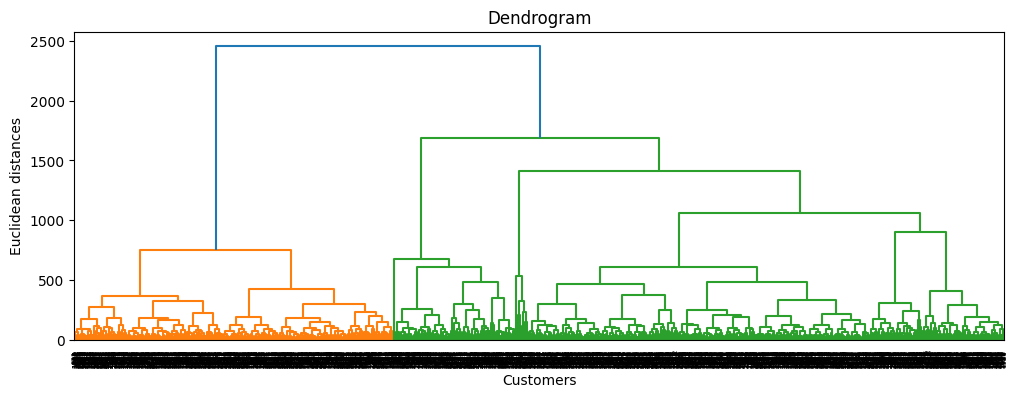

In [12]:
# dendogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,4))
dendrogram = sch.dendrogram(sch.linkage(df_new, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

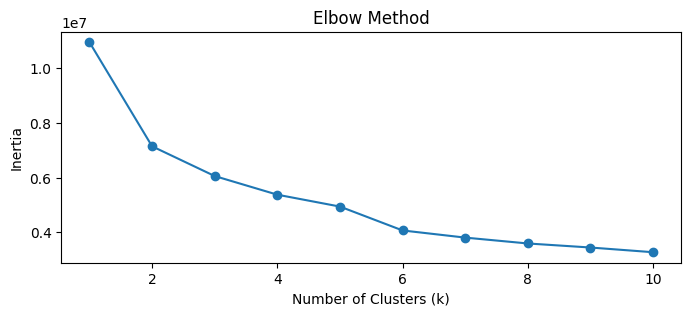

In [14]:
k_range = range(1,11);

inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df_new)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [15]:
""" So the number of clusters are 5 """

' So the number of clusters are 5 '

In [16]:
kmeans = kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(df_new)


In [17]:
y_kmeans

array([0, 1, 0, ..., 2, 4, 1], dtype=int32)

In [18]:
df_new['kmeans_label'] = y_kmeans
df_new.head()

,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,age,diabetes,glucose,prevalentStroke,prevalentHyp,BPMeds,kmeans_label
1,212.0,168.0,98.0,29.77,72.0,0.0,36,0,75.0,0,1,0.0,0
2,250.0,116.0,71.0,20.35,88.0,10.0,46,0,94.0,0,0,0.0,1
3,233.0,158.0,88.0,28.26,68.0,20.0,50,0,94.0,0,1,0.0,0
4,241.0,136.5,85.0,26.42,70.0,30.0,64,0,77.0,0,0,0.0,3
5,272.0,182.0,121.0,32.80,85.0,0.0,61,0,65.0,0,1,0.0,0


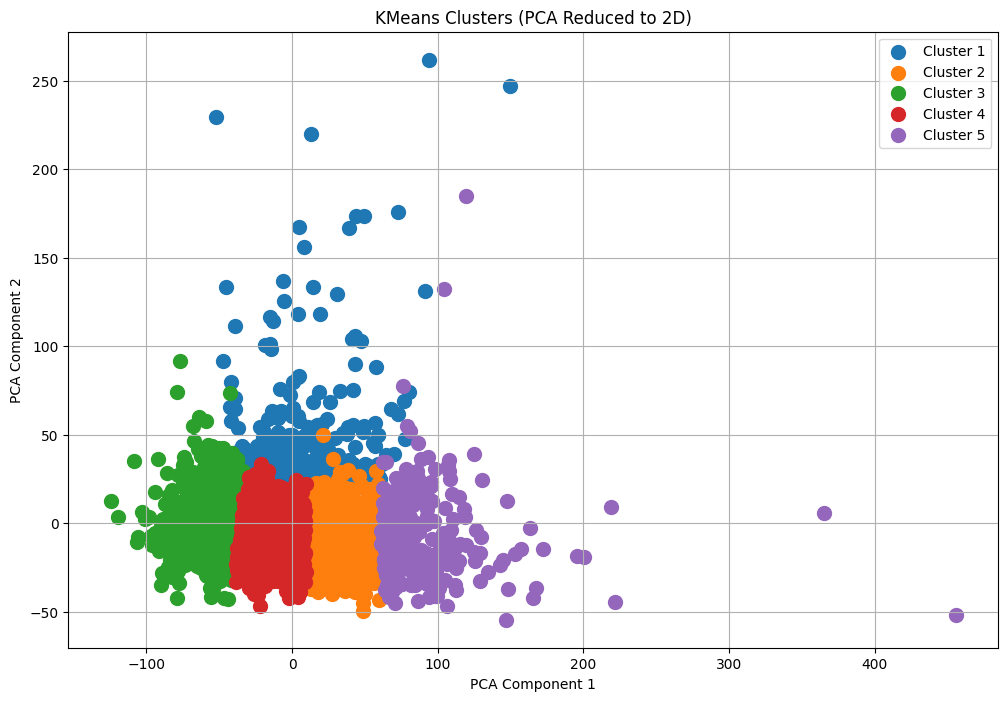

In [19]:
#now we will plot the clusters
from sklearn.decomposition import PCA


features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
            'cigsPerDay', 'age', 'diabetes', 'glucose',
            'prevalentStroke', 'prevalentHyp', 'BPMeds']

# Assuming df_clean is already cleaned (no nulls)
X = df_new[features]
labels = df_new['kmeans_label']


pca = PCA(n_components=2) #pca model reduces to 2D
X_pca = pca.fit_transform(X) #apply pca to get 2D output


plt.figure(figsize=(12, 8))

for cluster_id in range(len(set(labels))):  # automatically adapts to number of clusters
    plt.scatter(X_pca[labels == cluster_id, 0],
                X_pca[labels == cluster_id, 1],
                s=100,
                label=f'Cluster {cluster_id+1}')

plt.title('KMeans Clusters (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
#agglomerative clustering
hc = AgglomerativeClustering(n_clusters = 5,  linkage = 'ward')
y_hc = hc.fit_predict(df_new)

In [24]:
y_hc

array([1, 1, 1, ..., 1, 0, 0])

In [25]:
#insert the new columns with agglomerative clustering in data
df_new['aglo_label'] = y_hc
df_new.head()

,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,age,diabetes,glucose,prevalentStroke,prevalentHyp,BPMeds,kmeans_label,aglo_label
1,212.0,168.0,98.0,29.77,72.0,0.0,36,0,75.0,0,1,0.0,0,1
2,250.0,116.0,71.0,20.35,88.0,10.0,46,0,94.0,0,0,0.0,1,1
3,233.0,158.0,88.0,28.26,68.0,20.0,50,0,94.0,0,1,0.0,0,1
4,241.0,136.5,85.0,26.42,70.0,30.0,64,0,77.0,0,0,0.0,3,0
5,272.0,182.0,121.0,32.80,85.0,0.0,61,0,65.0,0,1,0.0,0,0


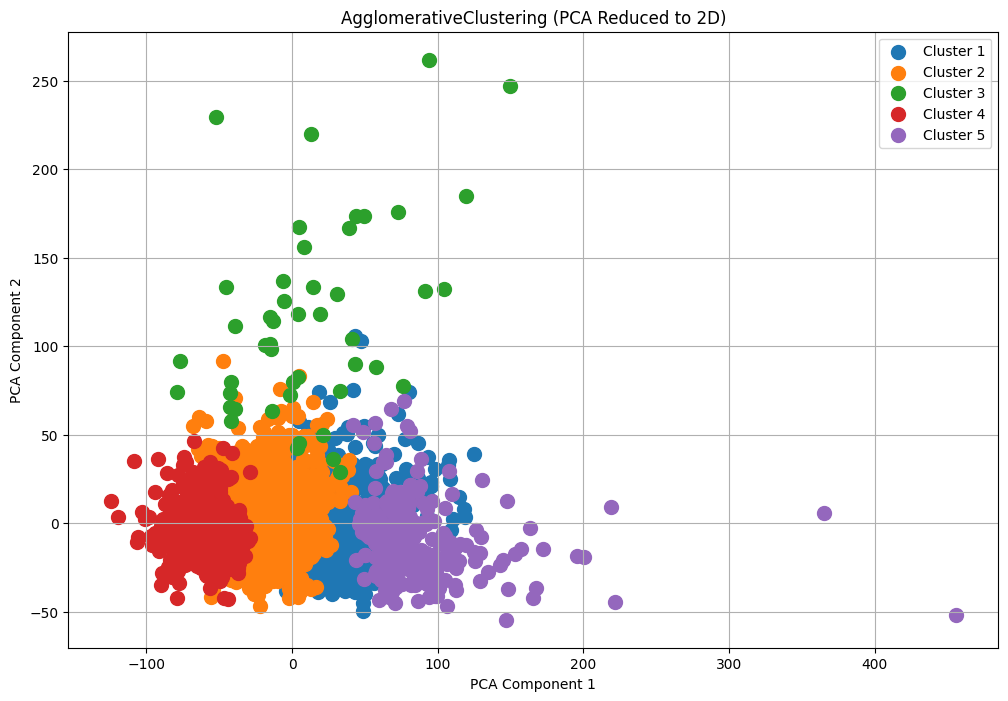

In [26]:
#now plot the curve which shows different clustering
features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
            'cigsPerDay', 'age', 'diabetes', 'glucose',
            'prevalentStroke', 'prevalentHyp', 'BPMeds']

# Assuming df_clean is already cleaned (no nulls)
X = df_new[features]
labels = df_new['aglo_label']


pca = PCA(n_components=2) #pca model reduces to 2D
X_pca = pca.fit_transform(X) #apply pca to get 2D output



plt.figure(figsize=(12, 8))

for cluster_id in range(len(set(labels))):  # automatically adapts to number of clusters
    plt.scatter(X_pca[labels == cluster_id, 0],
                X_pca[labels == cluster_id, 1],
                s=100,
                label=f'Cluster {cluster_id+1}')

plt.title('AgglomerativeClustering (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()